In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline

url='https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/train.csv'
tweets = pd.read_csv(url)

Populating the interactive namespace from numpy and matplotlib


In [23]:
tweets['es_una_mencion'] = tweets['text'].str.contains('@')
tweets.head()

,id,keyword,location,text,target,es_una_mencion
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False


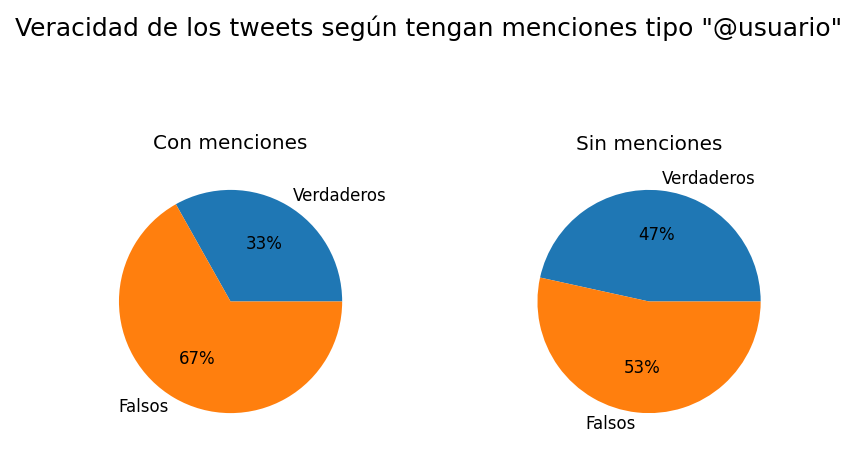

In [59]:
cantidad_de_tweets_con_menciones_verdaderos = tweets[(tweets['es_una_mencion'] == True) & (tweets['target'] == 1)].shape[0]
cantidad_de_tweets_con_menciones_falsos = tweets[(tweets['es_una_mencion'] == True) & (tweets['target'] == 0)].shape[0]
cantidad_de_tweets_sin_menciones_verdaderos = tweets[(tweets['es_una_mencion'] == False) & (tweets['target'] == 1)].shape[0]
cantidad_de_tweets_sin_menciones_falsos = tweets[(tweets['es_una_mencion'] == False) & (tweets['target'] == 0)].shape[0]

plt.rcParams['figure.dpi'] = 150

info1 = pd.Series([cantidad_de_tweets_con_menciones_verdaderos, cantidad_de_tweets_con_menciones_falsos],\
                  index = ['Verdaderos','Falsos'], name = '')
info2 = pd.Series([cantidad_de_tweets_sin_menciones_verdaderos, cantidad_de_tweets_sin_menciones_falsos],\
                  index = ['Verdaderos','Falsos'], name = '')
                  
mpl.rcParams['font.size'] = 10.0

fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('Veracidad de los tweets según tengan menciones tipo "@usuario"')

mpl.rcParams['font.size'] = 8.0

ax1.set_title('Con menciones')
ax2.set_title('Sin menciones')

info1.plot(kind='pie', ax = ax1, autopct='%1.0f%%')
info2.plot(kind='pie', ax = ax2, autopct='%1.0f%%')

plt.subplots_adjust(wspace = 0.5)